In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# importing linear regresssion
from sklearn.linear_model import LinearRegression as linreg
#training the data required model import
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
df=pd.read_csv('H:\\conda\\Machine_Learning\\autos.csv').reset_index(drop=True)
df.head(5)

,%symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower-peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
#df.describe(include='all')

In [8]:
# converting one metric into another metric
df.columns

Index(['%symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower-peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [16]:
#df['city-mpg']=235/df['city-mpg']
#df.rename(columns={"city-mpg":'city-l/km'}, inplace=True)
#df.head(3)

In [3]:
df['price'].tail(5)

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: object

In [4]:
df['price'].isna().count()

205

In [6]:
#df['price'].dropna()

In [7]:
df['price']=df['price'].replace('?',21485)
df['price']=df['price'].astype(int) # this will change the type of the value like from object to int or int to object 

In [4]:
df['price'].tail(2)

-1  95    22470
    95    22625
Name: price, dtype: int32

## Data Normalization

In [8]:
#df.describe()

In [10]:
#df[df.isna().any(axis=1)] # fethcing the specifi rows and columns if there is any NaN value

In [11]:
df.head(2)

,%symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower-peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [5]:
df['horsepower-peak-rpm'].tail(3)

-1  95    5500
    95    4800
    95    5400
Name: horsepower-peak-rpm, dtype: object

In [15]:
df.columns

Index(['%symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower-peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [3]:
df['horsepower-peak-rpm']=df['horsepower-peak-rpm'].replace('?',5000)

In [5]:
df['horsepower-peak-rpm']=df['horsepower-peak-rpm'].astype(int)

ValueError: invalid literal for int() with base 10: '?'

In [43]:
df['horsepower-peak-rpm'].tail(5)

200    5400
201    5300
202    5500
203    4800
204    5400
Name: horsepower-peak-rpm, dtype: int32

In [44]:
df['horsepower-peak-rpm'].mean()

5124.1463414634145

### Binning in python

In [3]:
df['price'].head(2)

0    13495
1    16500
Name: price, dtype: object

In [10]:
#bins=np.linspace(min(df['price']), max(df['price']),4) # divide the price into 3 equal parts
#group_name=['Low','Medium','High']
#df['binned_price']=pd.cut(df['price'],bins,labels=group_name,include_lowest=True) # pandas feature cut will sort according to the values

In [11]:
#df.drop('binned price',axis=1)
#df.head(2)
#df[df['binned_price']=='High'].head(5)

In [14]:
#group_name=['Low','Medium','High']
#plt.hist(df['binned_price'],label=[group_name])
#plt.show()

In [47]:
(df['price']=='High').count()

205

#### changing categorical values into quantitative variable

In [9]:
# one hot encoding
df['body-style'].unique()

array(['front', 'rear'], dtype=object)

In [10]:
pd.get_dummies(df['body-style'])

,front,rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,1,0
202,1,0
203,1,0


In [12]:
drive_wheel_counts=df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.head(2)

,drive-wheels
94.5,21
93.7,20


In [60]:
df.columns

Index(['%symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower-peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'binned_price'],
      dtype='object')

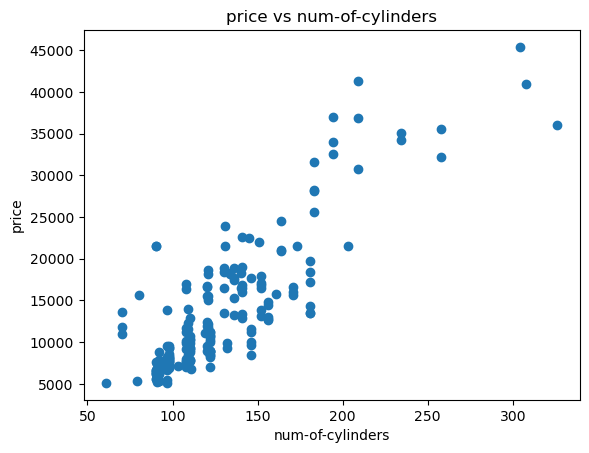

In [29]:
a=df['num-of-cylinders']
b=df['price']
plt.scatter(a,b)
plt.title('price vs num-of-cylinders')
plt.xlabel('num-of-cylinders')
plt.ylabel('price')
plt.show()

In [30]:
p_coeff,p_val= sp.stats.pearsonr(df['num-of-cylinders'],df['price'])
p_coeff,p_val

(0.8535091989163853, 2.2226982545886174e-59)

### Model Development 

In [32]:
# creating linear regression model
lm=linreg() # calling the function
x=df[['num-of-cylinders']]# independent variable or predictor variable # double [[]] indicate that it is in row and column
y=df['price'] # target variable
lm.fit(x,y)
Ytarget=lm.predict(x)
Ytarget
b0=lm.intercept_# finding the y-intercet y=b0+b1*x
print(b0)
b1=lm.coef_
print(b1)

# fitting in the model
car_price=b0+b1*x



-7315.34666189671
[162.98505019]


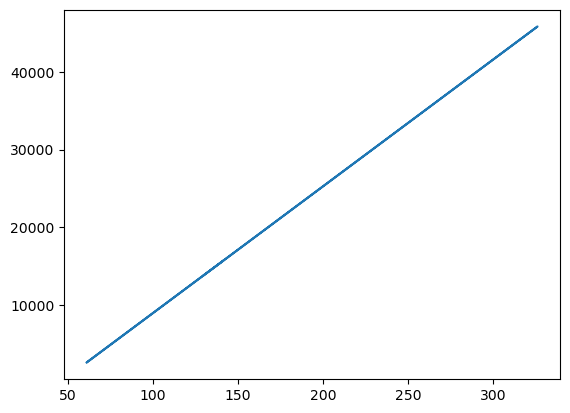

In [35]:
plt.plot(x,car_price)
plt.show()

### Multiple linear regression

In [ ]:
# vector (y)=b0+b1*x1+b2*x2+b3*x3+......

In [36]:
df.columns

Index(['%symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower-peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'binned_price'],
      dtype='object')

In [62]:
df['compression-ratio']=df['compression-ratio'].dropna().replace('?',186)


In [63]:
df['compression-ratio'].astype(int)

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: compression-ratio, Length: 205, dtype: int32

In [97]:
# generating multiple linear regression model
#df['num-of-cylinders'].tail(2)
df['compression-ratio'].max()

'?'

In [2]:
lm=linreg()
x=df[['stroke','num-of-cylinders','compression-ratio','highway-mpg']]
y=df['price']
lm.fit(x,y)
# predict
vect_y=lm.predict(x)

NameError: name 'df' is not defined

In [71]:
lm.intercept_

-652.7509853632037

In [17]:
b=lm.coef_
print(b)
vect_y=-652+(256*df['stroke'])+(115*df['num-of-cylinders'])+(31*df['compression-ratio'])-(209*df['highway-mpg'])

AttributeError: 'LinearRegression' object has no attribute 'coef_'

#### Regression plot

(0.0, 52624.448505882036)

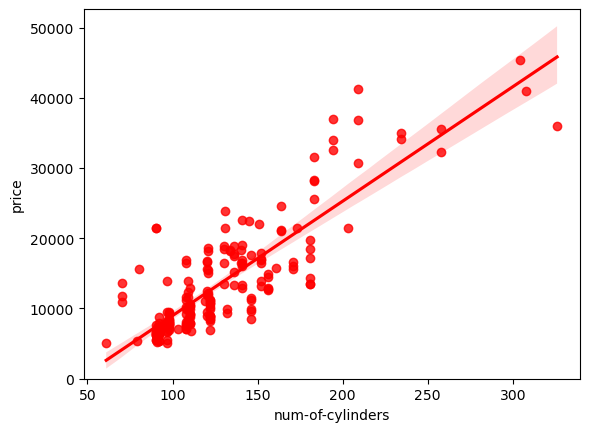

In [85]:
sns.regplot(x='num-of-cylinders',y='price',data=df,color='red')
plt.ylim(0,)

### Multiple regression

In [ ]:
f=np.polyfit(x,y,3)
p=np.poly1df(f)
print(p)

In [ ]:
## MULTIDIMENSIONAL POLYNOMIAL REGRESSION

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2,include_bias=False)
x_poll=pr.fit_transform(x[['horsepower','curb-weight']])

### Normalization

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scale=StandardScaler()

In [ ]:
scale.fit(x_data[['horsepower','curb-weight']])

### Error Correction ( MSE,RMSE...)

In [20]:
# importing library
from sklearn.metrics import mean_squared_error
mean_squared_error(df['actual value'], y_predicted_value_fit)

#### Finding R between two values

In [ ]:
from sklearn.preprocessing import Linearregression as linreg
linreg.score(x,Y) # this function will give the R score value

### MODEL EVALUATION

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)
scores=cross_val_score(lr,x_data,y_data,cv=3)# lr=linear regression model,cv=3 ( 3 equal partion of the dataset)

In [8]:
yhat=cross_val_predict(lr2e,x_data,y_data,cv=3)